# FRENTE NOS - Elecciones Primarias Abiertas, Obligatorias y Simultáneas (PASO), Ciudad Autónoma de Buenos Aires, 2019

## Análisis electoral - Frente NOS

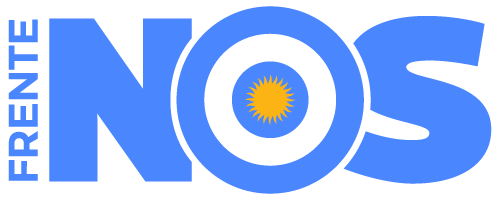

### Cantidad de votos obtenidos por cada agrupación en las PASO, CABA -2019

In [ ]:
import pandas as pd 
elecciones = pd.read_csv("https://raw.githubusercontent.com/taodeying/MET4OP/master/dataset/elecciones_2019/resultados/120819-054029/datos_agrup.csv", dtype=str) # Importamos y convertimos en str

elecciones['VOTOS_AGRUPACION'] = elecciones['VOTOS_AGRUPACION'].astype(int) # Cambiamos el tipo de dato a int para la columna VOTOS_AGRUPACION


presidente = elecciones.loc[:, 'NOMBRE_CATEGORIA'] == 'Presidente y Vicepresidente de la República' #Seleccionamos la categoría de Presidente y Vicepresidente
 

df_total_votos = (elecciones[['NOMBRE_AGRUPACION','VOTOS_AGRUPACION']] # Seleccionamos las columnas a analizar
          .loc[presidente]                                             # Seleccionamos los datos a analizar                                                                               
          .groupby(['NOMBRE_AGRUPACION'])                              # Indicamos las columnas que se mantendrán estables
          .sum()                                                       # Sumamos los votos de cada agrupación por comuna 
          .sort_values(['VOTOS_AGRUPACION'], ascending = False)        # Organizamos las agrupaciones en base a la cantidad de votos obtenidos de forma descendiente
)


df_votos_porcentaje = (df_total_votos.apply(lambda x: (x+0.)/x.sum()*100).round(2))

df_votos = pd.merge (df_total_votos, df_votos_porcentaje, on = ('NOMBRE_AGRUPACION'), how = 'outer')
df_votos.rename({'VOTOS_AGRUPACION_x':'Votos totales', 'VOTOS_AGRUPACION_y':'%'}, axis = 'columns' , inplace = True)
df_votos

,Votos totales,%
NOMBRE_AGRUPACION,,
JUNTOS POR EL CAMBIO,863169,44.25
FRENTE DE TODOS,637891,32.70
CONSENSO FEDERAL,168607,8.64
FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,75746,3.88
UNITE POR LA LIBERTAD Y LA DIGNIDAD,68828,3.53
BLANCO,62397,3.20
FRENTE NOS,22592,1.16
MOVIMIENTO AL SOCIALISMO,21470,1.10
NULO,19116,0.98


A diferencia de lo que sucedió a nivel nacional, donde el candidato Fernández obtuvo el 47,66% de los votos, con una diferencia de 15 puntos a su favor con su principal opositor, Mauricio Macri, en la CABA se impuso el ex-presidente con el 44,25% de los votos, distanciándose casi 12 puntos de Fernández.

El desempeño electoral del Frente NOS fue regular, ya que quedó posicionado en sexto lugar sobre un total de diez listas. 

[ Nota: Incluso los votos en blancos alcanzaron un porcentaje mayor. Si la elección se hubiese llevado a cabo únicamente en CABA, el Frente NOS no hubiese logrado superar el filtro de las PASO. ]

### Distribución nominal y porcentual de los votos que obtuvo el Frente NOS en las PASO según comuna, CABA - 2019

In [ ]:
df_nos = (elecciones[['NOMBRE_REGION','VOTOS_AGRUPACION']] # Seleccionamos las columnas a analizar
          .loc[presidente]                                 # Seleccionamos los datos a analizar
          .loc[nos]                                                                               
          .groupby(['NOMBRE_REGION'])                      # Indicamos las columnas que se mantendrán estables
          .sum()                                           # Sumamos los votos de cada agrupación por comuna 
)

df_prom_nos = (df_nos.apply(lambda x: (x+0.)/x.sum()*100).round()) 

df_promedio_nos = pd.merge (df_nos, df_prom_nos, on = ('NOMBRE_REGION'), how = 'outer')
df_promedio_nos.rename({'VOTOS_AGRUPACION_x':'Votos totales', 'VOTOS_AGRUPACION_y':'%'}, axis = 'columns' , inplace = True)
df_promedio_nos


,Votos totales,%
NOMBRE_REGION,,
COMUNA 01,1763,8.0
COMUNA 02,1841,8.0
COMUNA 03,1419,6.0
COMUNA 04,1622,7.0
COMUNA 05,1260,6.0
COMUNA 06,1084,5.0
COMUNA 07,1444,6.0
COMUNA 08,1421,6.0
COMUNA 09,1395,6.0


Observando la tabla podemos dar cuenta de que el desempeño electoral del Frente NOS fue homogéneo entre comunas, destacándose en los barrios de Retiro, San Nicolás, Puerto Madero, San Telmo, Monserrat y Constitución (comuna 1); Recoleta (comuna 2); Belgrano, Núnez y Colegiales (comuna 13); y Palermo (comuna 14). Contrariamente, obtuvo los peores resultados en Caballito (comuna 6); y en Chacarita, Villa Crespo, Paternal, Villa Ortúzar, Agronomía y Parque Chas (comuna 15)

### Mediana, media, valor mínimo y valor máximo de votos obtenidos por el Frente NOS en las PASO, CABA - 2019

In [ ]:
print('Media', df_nos.mean().round())         # Calculamos la mediana del total de votos que obtuvo el Frente NOS
print('Mediana', df_nos.median())             # Calculamos la mediana del total de votos que obtuvo el Frente NOS
print('Max', df_nos.max(), df_nos.idxmax())   # Calculamos el valor máximo del total de votos que obtuvo el Frente NOS
print('Min', df_nos.min(), df_nos.idxmin())   # Calculamos el valor mínimo del total de votos que obtuvo el Frente NO

Media Frente NOS    1506.0
dtype: float64
Mediana Frente NOS    1477.0
dtype: float64
Max Frente NOS    1848
dtype: int64 Frente NOS    COMUNA 13
dtype: object
Min Frente NOS    1074
dtype: int64 Frente NOS    COMUNA 15
dtype: object


El Frente NOS consiguió una media de votos de 1506, y una mediana de 1477 votos.  
Logró su máxima de votos en la comuna 13, con un total de 1848; mientras que su mínimo de votos fue de 1074 en la comuna 15.

## Análisis electoral comparativo - Frente NOS, Juntos por el Cambio y Frente UNITE

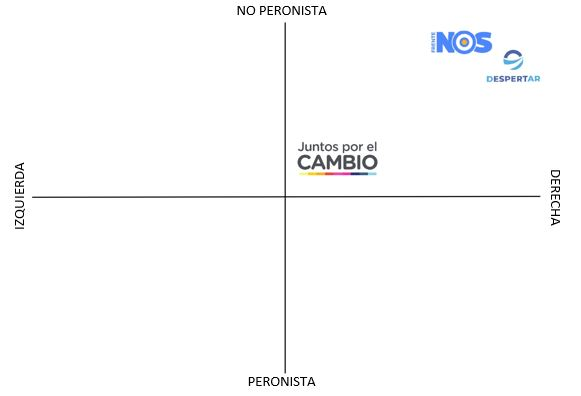

### Distribución nominal y porcentual de los votos que obtuvieron el Frente NOS, Juntos por el Cambio y el Frente UNITE en las PASO según comuna, CABA - 2019

In [ ]:
# Seleccionamos cada uno de los datos a analizar de acuerdo con su CODIGO_AGRUPACION
nos = (elecciones.loc[:,'CODIGO_AGRUPACION'] == '131') 
jxc = (elecciones.loc[:,'CODIGO_AGRUPACION'] == '135')
unite = (elecciones.loc[:,'CODIGO_AGRUPACION'] == '87') 
blanco= (elecciones.loc[:,'CODIGO_AGRUPACION'] == 'VB')
impgunado = (elecciones.loc[:,'CODIGO_AGRUPACION'] == 'VII') 
nulo = (elecciones.loc[:,'CODIGO_AGRUPACION'] == 'VN') 
recurrido = (elecciones.loc[:,'CODIGO_AGRUPACION'] == 'VR')
presidente = elecciones.loc[:, 'NOMBRE_CATEGORIA'] == 'Presidente y Vicepresidente de la República'


df_nos = (elecciones[['NOMBRE_REGION','NOMBRE_AGRUPACION','VOTOS_AGRUPACION']]        
          .loc[presidente]                                                            
          .loc[nos]                                                                               
          .groupby(['NOMBRE_REGION','NOMBRE_AGRUPACION'])                             
          .sum()                                                                       
)

df_jxc = (elecciones[['NOMBRE_REGION', 'NOMBRE_AGRUPACION','VOTOS_AGRUPACION']]       
          .loc[presidente]                                                            
          .loc[jxc]                                                                               
          .groupby(['NOMBRE_REGION', 'NOMBRE_AGRUPACION'])                            
          .sum()                                                                      
)

df_unite = (elecciones[['NOMBRE_REGION', 'NOMBRE_AGRUPACION','VOTOS_AGRUPACION']]     
          .loc[presidente]                                                            
          .loc[unite]                                                                               
          .groupby(['NOMBRE_REGION', 'NOMBRE_AGRUPACION'])                           
          .sum()                                                                       
)

df_blanco = (elecciones[['NOMBRE_REGION','NOMBRE_AGRUPACION','VOTOS_AGRUPACION']]    
          .loc[presidente]                                                            
          .loc[blanco]                                                                               
          .groupby(['NOMBRE_REGION','NOMBRE_AGRUPACION'])                             
          .sum()                                                                      
)

df_impugnado = (elecciones[['NOMBRE_REGION','NOMBRE_AGRUPACION','VOTOS_AGRUPACION']]  
          .loc[presidente]                                                            
          .loc[impgunado]                                                                               
          .groupby(['NOMBRE_REGION','NOMBRE_AGRUPACION'])                             
          .sum()                                                                       
)

df_nulo = (elecciones[['NOMBRE_REGION','NOMBRE_AGRUPACION','VOTOS_AGRUPACION']]       
          .loc[presidente]                                                            
          .loc[nulo]                                                                               
          .groupby(['NOMBRE_REGION','NOMBRE_AGRUPACION'])                             
          .sum()                                                                       
)

df_recurrido = (elecciones[['NOMBRE_REGION','NOMBRE_AGRUPACION','VOTOS_AGRUPACION']]  
          .loc[presidente]                                                            
          .loc[recurrido]                                                                               
          .groupby(['NOMBRE_REGION','NOMBRE_AGRUPACION'])                             
          .sum()                                                                     
)

# Calculamos el promedio para cada uno de las categorías de VOTOS_AGRUPACION
df_nos_promedio = (df_nos.apply(lambda x: (x+0.)/x.sum()*100).round())
df_jxc_promedio = (df_jxc.apply(lambda x: (x+0.)/x.sum()*100).round())
df_unite_promedio = (df_unite.apply(lambda x: (x+0.)/x.sum()*100).round())
df_blanco_promedio = (df_blanco.apply(lambda x: (x+0.)/x.sum()*100).round())
df_impugnado_promedio = (df_impugnado.apply(lambda x: (x+0.)/x.sum()*100).round())
df_nulo_promedio = (df_nulo.apply(lambda x: (x+0.)/x.sum()*100).round())
df_recurrido_promedio = (df_recurrido.apply(lambda x: (x+0.)/x.sum()*100).round())

# Armamos una serie de joins hasta lograr un join completo
df_frentes1 = pd.merge (df_nos, df_nos_promedio, on = ('NOMBRE_REGION'), how = 'outer')
df_frentes1.rename({'VOTOS_AGRUPACION_x':'Frente NOS', 'VOTOS_AGRUPACION_y':'%'}, axis = 'columns' , inplace = True)
df_frentes2 = pd.merge (df_frentes1, df_jxc, on = ('NOMBRE_REGION'), how = 'outer')
df_frentes3 = pd.merge (df_frentes2, df_jxc_promedio, on = ('NOMBRE_REGION'), how = 'outer')
df_frentes3.rename({'VOTOS_AGRUPACION_x':'Juntos por el Cambio', 'VOTOS_AGRUPACION_y':'%'}, axis = 'columns' , inplace = True)
df_frentes4 = pd.merge (df_frentes3, df_unite, on = ('NOMBRE_REGION'), how = 'outer')
df_frentes5 = pd.merge (df_frentes4, df_unite_promedio, on = ('NOMBRE_REGION'), how = 'outer')
df_frentes5.rename({'VOTOS_AGRUPACION_x':'Frente UNITE', 'VOTOS_AGRUPACION_y':'%'}, axis = 'columns' , inplace = True)
df_frentes6 = pd.merge (df_frentes5, df_blanco, on = ('NOMBRE_REGION'), how = 'outer')
df_frentes7 = pd.merge (df_frentes6, df_blanco_promedio, on = ('NOMBRE_REGION'), how = 'outer')
df_frentes7.rename({'VOTOS_AGRUPACION_x':'Votos en blanco', 'VOTOS_AGRUPACION_y':'%'}, axis = 'columns' , inplace = True)
df_frentes8 = pd.merge (df_frentes7, df_impugnado, on = ('NOMBRE_REGION'), how = 'outer')
df_frentes9 = pd.merge (df_frentes8, df_impugnado_promedio, on = ('NOMBRE_REGION'), how = 'outer')
df_frentes9.rename({'VOTOS_AGRUPACION_x':'Votos impugnados', 'VOTOS_AGRUPACION_y':'%'}, axis = 'columns' , inplace = True)
df_frentes10 = pd.merge (df_frentes9, df_nulo, on = ('NOMBRE_REGION'), how = 'outer')
df_frentes11 = pd.merge (df_frentes10, df_nulo_promedio, on = ('NOMBRE_REGION'), how = 'outer')
df_frentes11.rename({'VOTOS_AGRUPACION_x':'Votos nulos', 'VOTOS_AGRUPACION_y':'%'}, axis = 'columns' , inplace = True)
df_frentes12 = pd.merge (df_frentes11, df_recurrido, on = ('NOMBRE_REGION'), how = 'outer')
df_frentes13 = pd.merge (df_frentes12, df_recurrido_promedio, on = ('NOMBRE_REGION'), how = 'outer')
df_frentes13.rename({'VOTOS_AGRUPACION_x':'Votos recurridos', 'VOTOS_AGRUPACION_y':'%'}, axis = 'columns' , inplace = True)
df_frentes13


,Frente NOS,%,Juntos por el Cambio,%,Frente UNITE,%,Votos en blanco,%,Votos impugnados,%,Votos nulos,%,Votos recurridos,%
NOMBRE_REGION,,,,,,,,,,,,,,
COMUNA 01,1763,8.0,54568,6.0,4106,6.0,3674,6.0,14,4.0,1010,5.0,62,10.0
COMUNA 02,1841,8.0,65519,8.0,3627,5.0,2493,4.0,21,5.0,756,4.0,39,6.0
COMUNA 03,1419,6.0,46502,5.0,4051,6.0,3790,6.0,7,2.0,1299,7.0,25,4.0
COMUNA 04,1622,7.0,47191,5.0,4134,6.0,5801,9.0,35,9.0,1426,7.0,36,6.0
COMUNA 05,1260,6.0,48489,6.0,4277,6.0,3810,6.0,15,4.0,1182,6.0,38,6.0
COMUNA 06,1084,5.0,58450,7.0,4759,7.0,3968,6.0,9,2.0,1199,6.0,40,6.0
COMUNA 07,1444,6.0,53251,6.0,5099,7.0,4631,7.0,55,14.0,1325,7.0,52,8.0
COMUNA 08,1421,6.0,31848,4.0,2964,4.0,3792,6.0,68,18.0,1246,7.0,45,7.0
COMUNA 09,1395,6.0,42504,5.0,4355,6.0,3818,6.0,30,8.0,1253,7.0,28,4.0


El Frente NOS, Juntos por el Cambio y el Frente UNITE se encuentran ubicados en el cuadrante "No peronista - Derecha", por lo que las tres fuerzas compiten por un mismo sector del electorado.

Al igual que el Frente NOS, Juntos por el Cambio obtuvo un apoyo electoral significativo en la comuna 13 y en la comuna 14. Por otro lado, fue en la comuna 8 donde se desempeñó peor.  

El Frente UNITE también logró buenos resultados en la comuna 13, aunque también en la comuna 12, en los barrios de Saavedra, Coghlan, Villa Urquiza y Villa Pueyrredón. Su peor rendimiento lo obtuvo en la comuna 8, al igual que JxC.

### Mediana, media, valor mínimo y valor máximo de votos obtenidos por Juntos por el Cambio y por el Frente UNITE en las PASO, CABA - 2019

In [ ]:
print('Juntos por el cambio')
print('Media', df_jxc.mean().round())               # Calculamos la mediana del total de votos que obtuvo Juntos por el Cambio
print('Mediana', df_jxc.median())                   # Calculamos la mediana del total de votos que obtuvo Juntos por el Cambio
print('Max', df_jxc.max(), df_jxc.idxmax())         # Calculamos el valor máximo del total de votos que obtuvo Juntos por el Cambio
print('Min', df_jxc.min(), df_jxc.idxmin())         # Calculamos el valor mínimo del total de votos que obtuvo Juntos por el Cambio

print('UNITE')
print('Media', df_unite.mean().round())             # Calculamos la mediana del total de votos que obtuvo el Frente UNITE
print('Mediana', df_unite.median())                 # Calculamos la mediana del total de votos que obtuvo el Frente UNITE
print('Max', df_unite.max(), df_unite.idxmax())     # Calculamos el valor máximo del total de votos que obtuvo el Frente UNITE
print('Min', df_unite.min(), df_unite.idxmin())     # Calculamos el valor mínimo del total de votos que obtuvo el Frente UNITE

print('VOTOS EN BLANCO')
print('Media', df_blanco.mean().round())             # Calculamos la mediana del total de Votos en blanco
print('Mediana', df_blanco.median())                 # Calculamos la mediana del total de Votos en blanco
print('Max', df_blanco.max(), df_unite.idxmax())     # Calculamos el valor máximo del total de Votos en blanco
print('Min', df_blanco.min(), df_unite.idxmin())     # Calculamos el valor mínimo del total Votos en blanco

Juntos por el cambio
Media VOTOS_AGRUPACION    57545.0
dtype: float64
Mediana VOTOS_AGRUPACION    53251.0
dtype: float64
Max VOTOS_AGRUPACION    97275
dtype: int64 VOTOS_AGRUPACION    (COMUNA 13, JUNTOS POR EL CAMBIO)
dtype: object
Min VOTOS_AGRUPACION    31848
dtype: int64 VOTOS_AGRUPACION    (COMUNA 08, JUNTOS POR EL CAMBIO)
dtype: object
UNITE
Media VOTOS_AGRUPACION    4589.0
dtype: float64
Mediana VOTOS_AGRUPACION    4355.0
dtype: float64
Max VOTOS_AGRUPACION    6321
dtype: int64 VOTOS_AGRUPACION    (COMUNA 13, UNITE POR LA LIBERTAD Y LA DIGNIDAD)
dtype: object
Min VOTOS_AGRUPACION    2964
dtype: int64 VOTOS_AGRUPACION    (COMUNA 08, UNITE POR LA LIBERTAD Y LA DIGNIDAD)
dtype: object
VOTOS EN BLANCO
Media VOTOS_AGRUPACION    4160.0
dtype: float64
Mediana VOTOS_AGRUPACION    4031.0
dtype: float64
Max VOTOS_AGRUPACION    5801
dtype: int64 VOTOS_AGRUPACION    (COMUNA 13, UNITE POR LA LIBERTAD Y LA DIGNIDAD)
dtype: object
Min VOTOS_AGRUPACION    2493
dtype: int64 VOTOS_AGRUPACION    (C

Analizando los resultados electorales en CABA desde una perspectiva comparada, encontramos que el desempeño de JxC fue notablemente superior al de las fuerzas restantes, con una media de 57.545 votos y una mediana de 53.251. 

Por otro lado, si bien la cantidad de votos reunida por el Frente UNITE se encuentra muy alejada del total de votos de JxC, aun así su desempeño electoral fue mejor que el del Frente NOS, con una media tres veces mayor, de 4589 votos.

Las tres fuerzas en cuestión obtuvieron su mejor desempeño electoral en la comuna 13, en los barrios de Belgrano, Núnez y Colegiales. Sin embargo, JxC y UNITE lograron su cantidad mínima de votos en los barrios de Villa Soldati, Villa Riachuelo y Villa Lugano (comuna 8), mientras que el Frente NOS lo hizo en la comuna 15.

Uno de los datos llamativos del análisis es que los votos en blanco también alcanzaron una media casi tres veces mayor a la del Frente NOS, con 4160 votos. Incluso en la comuna 13, donde NOS obtuvo su mayor cantidad de votos, hubo una mayor predispoción a votar en blanco. A pesar de que los votos en blanco alcanzaron su menor porcentaje en la comuna 8, aun así logran sumar más de mil votos a su favor, en comparación con el Frente NOS.

### Mapa de la Ciudad Autónoma de Buenos Aires de acuerdo con sus barrios porteños y respectivas comunas, 2019

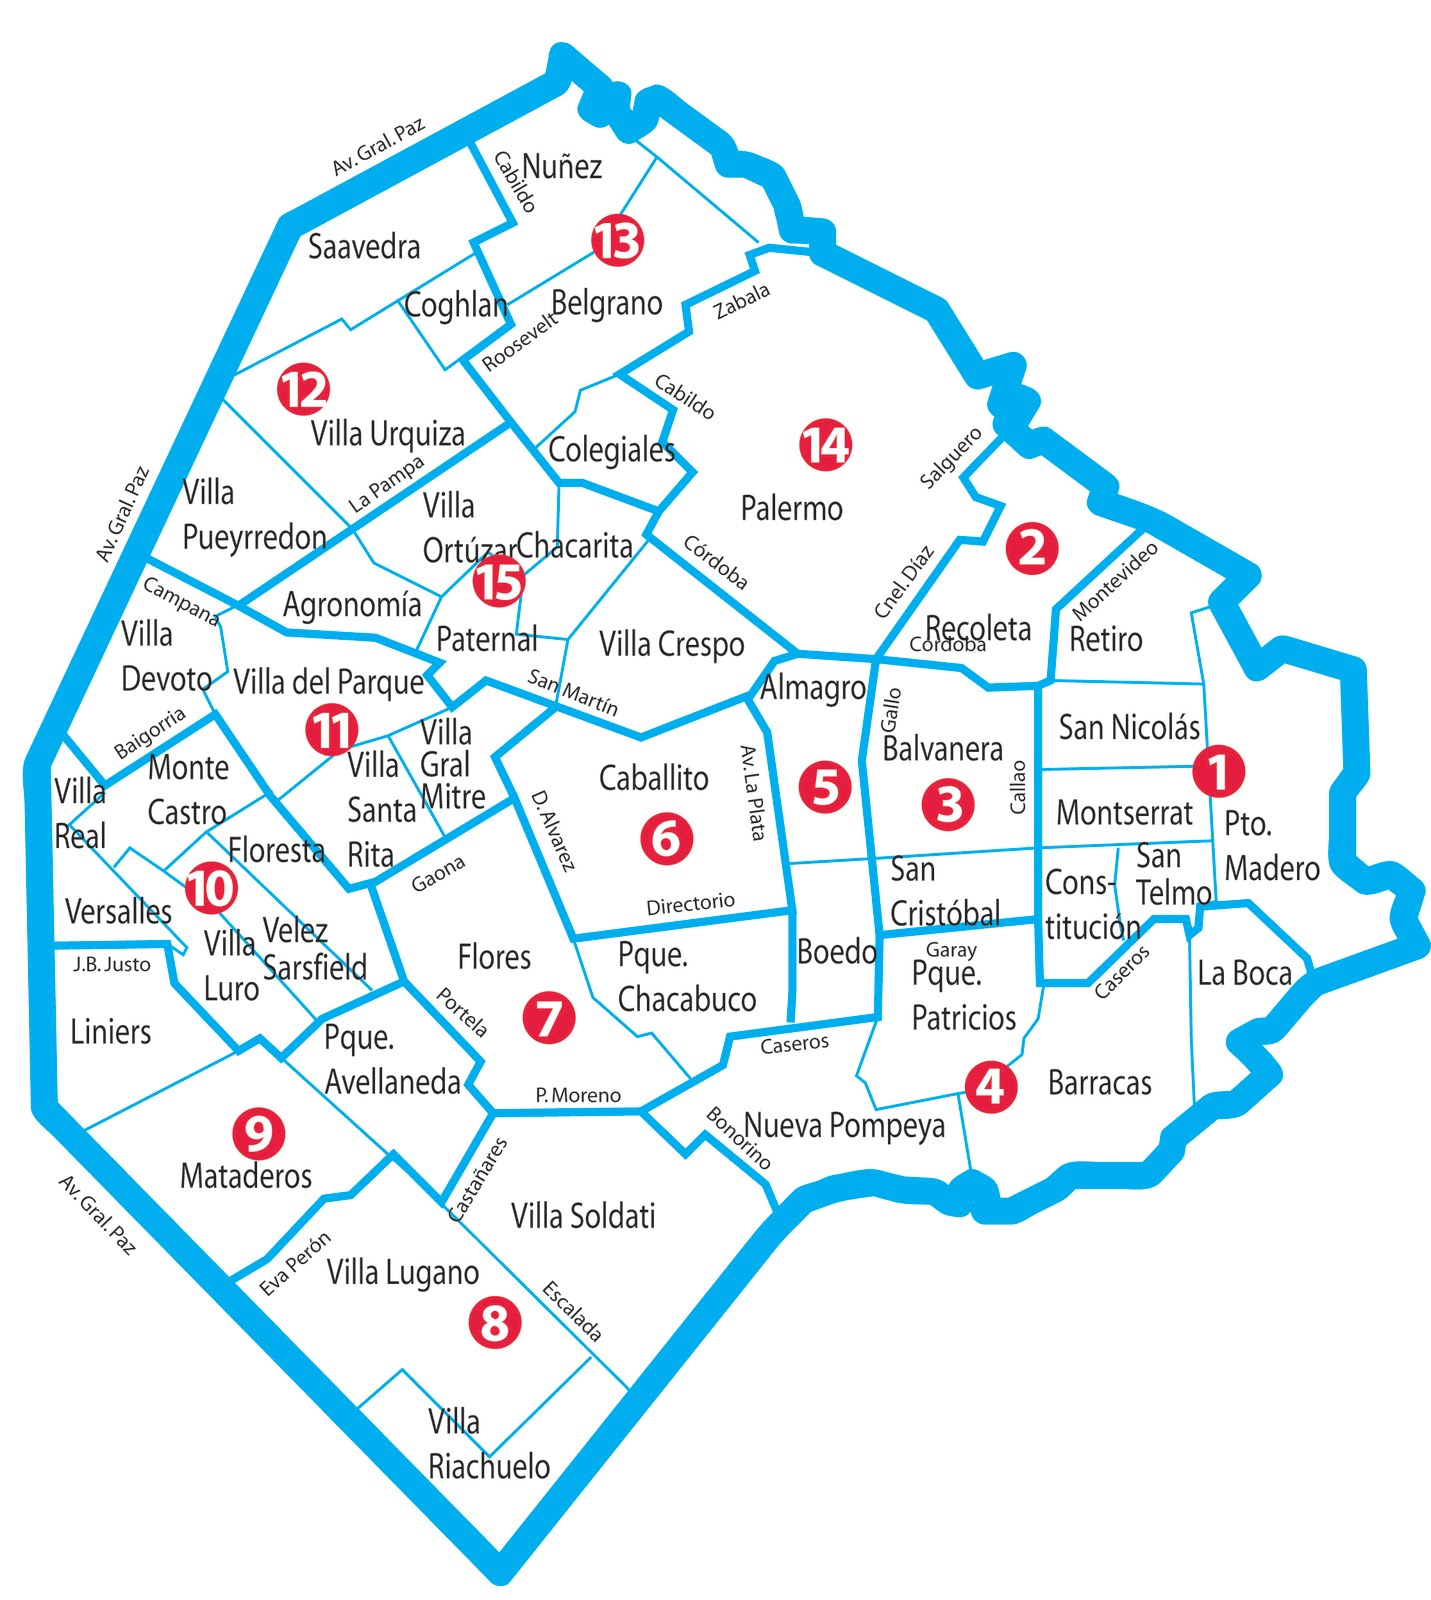